In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

file=pd.read_csv(r'C:\rahul\rahul\NITK\Semester IV\IET_project\samples\ml_inp2.csv')

In [2]:
file.head()

,0,1,2,3,4,5,6,7,8,9,...,231,232,233,234,235,236,237,238,239,ges
0,71.982422,37.060639,17.937020,1.149378,8.672890,7.175745,3.388095,3.620293,3.507729,8.622306,...,8.622306,3.507729,3.620293,3.388095,7.175745,8.672890,1.149378,17.937020,37.060639,1
1,75.859375,21.687200,6.257866,6.869791,6.109959,1.776679,2.966246,1.239602,3.540910,3.552432,...,3.552432,3.540910,1.239602,2.966246,1.776679,6.109959,6.869791,6.257866,21.687200,1
2,160.087891,74.411957,33.082689,11.872473,21.443975,14.124549,8.068626,14.112193,10.442393,4.824432,...,4.824432,10.442393,14.112193,8.068626,14.124549,21.443975,11.872473,33.082689,74.411957,1
3,208.530273,87.684459,24.165588,24.848189,17.298508,9.664254,17.642300,8.421950,9.400841,5.681136,...,5.681136,9.400841,8.421950,17.642300,9.664254,17.298508,24.848189,24.165588,87.684459,1
4,56.093750,22.679705,7.738531,5.487374,7.954194,3.317685,1.462483,2.375024,1.530923,1.209265,...,1.209265,1.530923,2.375024,1.462483,3.317685,7.954194,5.487374,7.738531,22.679705,1


In [3]:
x = file.drop(columns=['ges'])
y = file['ges']

In [4]:
x1=x.iloc[:,:120]
x2=x1.iloc[:,1:120]
x3=x2*2
x3['0']=x1.iloc[:,:1]
x3.head()

,1,2,3,4,5,6,7,8,9,10,...,111,112,113,114,115,116,117,118,119,0
0,74.121279,35.874041,2.298757,17.345780,14.351490,6.776190,7.240586,7.015458,17.244612,21.031209,...,1.524345,1.559156,1.256021,0.692900,1.151182,0.841533,0.164223,1.010011,1.533135,71.982422
1,43.374400,12.515733,13.739583,12.219918,3.553357,5.932493,2.479205,7.081820,7.104865,1.441310,...,0.672121,0.933101,1.389408,0.719616,0.714164,0.763468,0.564713,0.868154,0.470731,75.859375
2,148.823915,66.165378,23.744947,42.887950,28.249098,16.137252,28.224386,20.884785,9.648864,17.741076,...,0.908628,0.636030,0.974683,2.537122,3.263043,2.300307,1.956073,2.852104,2.698683,160.087891
3,175.368917,48.331176,49.696378,34.597017,19.328507,35.284599,16.843901,18.801683,11.362271,9.559265,...,2.608076,2.133794,1.300433,1.243745,1.436777,1.554751,1.630784,2.511762,2.058786,208.530273
4,45.359411,15.477062,10.974747,15.908388,6.635370,2.924965,4.750048,3.061846,2.418530,4.205261,...,0.915893,0.715255,0.276560,0.260537,0.829875,1.334538,1.669857,1.486957,0.654216,56.093750


In [5]:
x3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Columns: 120 entries, 1 to 0
dtypes: float64(120)
memory usage: 100.4 KB


In [6]:
x4=x3.transpose()
x4=x4.fillna(0.0)
x3=x4.transpose()

In [7]:
a=x4.isnull().sum()

In [8]:
a[70:80]

70    0
71    0
72    0
73    0
74    0
75    0
76    0
77    0
78    0
79    0
dtype: int64

In [9]:
b.head(1)

NameError: name 'b' is not defined

In [10]:
x3=x3.astype('float32')

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x3, y, test_size=0.25, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = pd.DataFrame(sc.fit_transform(x_train))
x_test = pd.DataFrame(sc.transform(x_test))

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

lr_grid = {'max_depth' : [4,8,16,32,64,128],
           'criterion' : ['entropy','gini']}

clf = RandomForestClassifier(n_estimators=200, max_features='sqrt', random_state=42)

gs = GridSearchCV(estimator = clf, param_grid=lr_grid,cv = 8)
gs.fit(x_train,y_train)
y_pred = gs.predict(x_test)

In [14]:
gs.best_params_

{'criterion': 'entropy', 'max_depth': 8}

In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
cl=classification_report(y_test,y_pred)
cn=confusion_matrix(y_test,y_pred)
print('Classification Report: \n', classification_report(y_test,y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test,y_pred))

Classification Report: 
               precision    recall  f1-score   support

           1       0.50      0.50      0.50         6
           2       0.50      0.17      0.25         6
           3       0.29      0.40      0.33         5
           4       0.40      0.29      0.33         7
           5       0.43      1.00      0.60         3

    accuracy                           0.41        27
   macro avg       0.42      0.47      0.40        27
weighted avg       0.43      0.41      0.38        27

Confusion Matrix: 
 [[3 0 1 2 0]
 [0 1 3 0 2]
 [2 0 2 1 0]
 [1 1 1 2 2]
 [0 0 0 0 3]]


          op_cl_op  cl_rd_cl  ex_fl_ex  sp_pr_sp  pn_op_pn
op_cl_op         3         0         1         2         0
cl_rd_cl         0         1         3         0         2
ex_fl_ex         2         0         2         1         0
sp_pr_sp         1         1         1         2         2
pn_op_pn         0         0         0         0         3


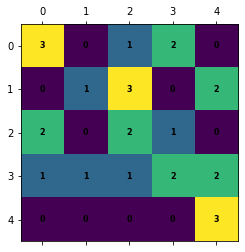

In [26]:
class_labels=['op_cl_op','cl_rd_cl','ex_fl_ex','sp_pr_sp','pn_op_pn']
df_cm = pd.DataFrame(cn, index=class_labels, columns=class_labels)

# ... (your formatting code)

print(df_cm.to_string())  # Print the formatted DataFrame as a string

# Using Matplotlib (example)
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.matshow(cn)

# ... (your formatting code)
# Iterate through confusion matrix elements and add text annotations
for i in range(len(cn)):
    for j in range(len(cn[0])):
        plt.text(j, i, cn[i, j], ha='center', va='center', fontsize=8, fontweight='bold')

plt.show()

In [24]:
 df_cm.itertuples()

In [18]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
# Assuming you already have the confusion matrix (cm) and class labels
plot_confusion_matrix(None, None, None, display_labels=[1,2,3,4,5], cm=confusion_matrix(y_test,y_pred), cmap=plt.cm.Greens)
plt.show()


TypeError: plot_confusion_matrix() got an unexpected keyword argument 'cm'

In [ ]:
from sklearn.metrics import plot_confusion_matrix

# Assuming you have your confusion matrix (cm) and class labels
plot_confusion_matrix(estimator, X_test, y_test, display_labels=class_labels, cmap=plt.cm.Greens)
plt.show()

In [ ]:
x1=x.iloc[:,:120]
x2=x1.iloc[:,1:120]
x5=x2*2

In [ ]:
x6=x5.transpose()
a=x6.isnull().sum()

In [ ]:
a[40:50]

In [ ]:

x6=x6.fillna(0)

x5=x6.transpose()

In [ ]:
a=x6.isnull().sum()
a[40:50]

In [ ]:
b

In [ ]:
x5=x5.astype('float32')

In [ ]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x5, y, test_size=0.25, random_state=42)

In [ ]:
lr_grid = {'max_depth' : [4,8,16,32,64,128],
           'criterion' : ['entropy','gini']}

clf = RandomForestClassifier(n_estimators=200, max_features='sqrt', random_state=42)

gs = GridSearchCV(estimator = clf, param_grid=lr_grid,cv = 5)
gs.fit(x1_train,y1_train)
y1_pred = gs.predict(x1_test)

In [ ]:
x1_train = pd.DataFrame(sc.fit_transform(x1_train))
x1_test = pd.DataFrame(sc.transform(x1_test))

In [ ]:
gs.fit(x1_train,y1_train)
y1_pred = gs.predict(x1_test)

In [ ]:
gs.best_params_

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('Classification Report: \n', classification_report(y1_test,y1_pred))
print('Confusion Matrix: \n', confusion_matrix(y1_test,y1_pred))